In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.12.0


In [15]:
model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(24,24,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
# softmax classifier
model.add(Dense(3))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 20)        1520      
                                                                 
 activation_8 (Activation)   (None, 24, 24, 20)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2880)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              2881000   
                                                                 
 activation_9 (Activation)   (None, 1000)              0         
                                                      

In [19]:
# create CNN Model
class LeNet:

    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


In [20]:
b = LeNet.build(width=28, height=28, depth=3, classes=3)

In [21]:
b.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 activation_18 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_19 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
import os
os.chdir("/content/drive/MyDrive/PGA17/Deep Learning/Code Files/2. CNN")

In [ ]:
!dir

In [ ]:
DATASET = "dataset"  # this folde must contain three subfolder with images
MODEL = "Scene.model" # name to store the model on disk
PLOT = "plot.png" # plot name

EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [ ]:
# # run only one time then comment everythin

# !pip install patool
# import patoolib
# patoolib.extract_archive("dataset.rar")
# patoolib.extract_archive("test_examples.rar")

In [27]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Buildings":
            label = 0
        elif label == "Forest":
            label = 1
        elif label == "Sea":
            label = 2

        labels.append(label)
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/1326 [00:00<?, ?it/s]

In [31]:
data[0].shape

(28, 28, 3)

In [29]:
data[0].shape

(28, 28, 3)

In [32]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [33]:
labels

array([0, 1, 0, ..., 0, 0, 2])

In [34]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [35]:
trainX.shape

(994, 28, 28, 3)

In [36]:
trainY.shape

(994,)

In [37]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [38]:
trainY[0]

array([1., 0., 0.], dtype=float32)

# Data Preprocessing (Augumentation)

In [39]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

In [ ]:
# initialize the model
print("[INFO] compiling model...")
le_model = LeNet.build(width=28, height=28, depth=3, classes=3)

opt = Adam(learning_rate=INIT_LR)
le_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model complied...")

In [ ]:
print(le_model.summary())

In [ ]:
# tf.config.experimental_run_functions_eagerly(True)

In [42]:
# train the network
print("[INFO] training network...")
H = le_model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=50, 
              verbose=1)

[INFO] training network...
Epoch 1/50
31/31 [==============================] - 13s 56ms/step - loss: 0.8711 - accuracy: 0.5603 - val_loss: 1.1848 - val_accuracy: 0.4337
Epoch 2/50
31/31 [==============================] - 1s 26ms/step - loss: 0.7871 - accuracy: 0.6424 - val_loss: 0.8028 - val_accuracy: 0.6416
Epoch 3/50
31/31 [==============================] - 1s 22ms/step - loss: 0.6659 - accuracy: 0.7245 - val_loss: 1.3935 - val_accuracy: 0.4428
Epoch 4/50
31/31 [==============================] - 1s 22ms/step - loss: 0.7227 - accuracy: 0.6705 - val_loss: 0.5458 - val_accuracy: 0.7681
Epoch 5/50
31/31 [==============================] - 1s 22ms/step - loss: 0.6127 - accuracy: 0.7297 - val_loss: 0.6506 - val_accuracy: 0.7289
Epoch 6/50
31/31 [==============================] - 1s 21ms/step - loss: 0.5915 - accuracy: 0.7588 - val_loss: 0.6926 - val_accuracy: 0.6054
Epoch 7/50
31/31 [==============================] - 1s 21ms/step - loss: 0.5677 - accuracy: 0.7713 - val_loss: 0.5377 - val_ac

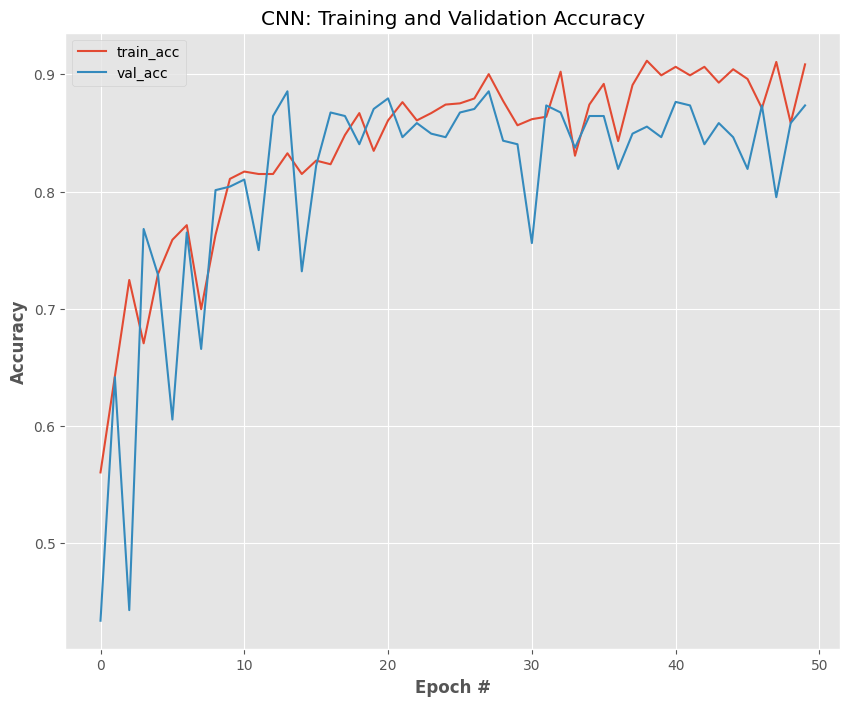

In [43]:
# plot the training and validation accuracy
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

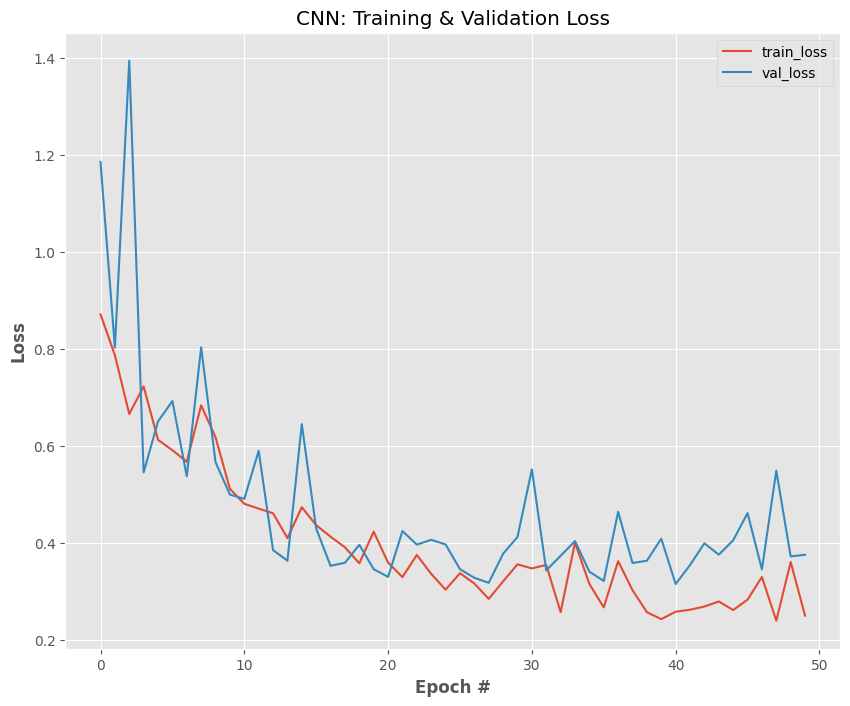

In [44]:
# plot the training and validation loss
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [45]:
le_model.save("CNN_MODEL.model", save_format="h5")

In [46]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [50]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    # plt.grid(b=None)
    ax = fig.add_subplot(111)

    ax.imshow(img)

In [51]:
from tqdm import tqdm

[INFO] loading network and...


  0%|          | 0/28 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
[0.5929558  0.08832493 0.31871918]
1/1 [==============================] - 0s 26ms/step


  7%|▋         | 2/28 [00:01<00:13,  1.90it/s]

[0.3127539  0.6273955  0.05985057]
1/1 [==============================] - 0s 25ms/step


 11%|█         | 3/28 [00:02<00:19,  1.31it/s]

[0.06576094 0.02448588 0.9097532 ]
1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 4/28 [00:02<00:17,  1.37it/s]

[0.12332693 0.0187945  0.8578786 ]
1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 5/28 [00:04<00:21,  1.05it/s]

[0.09470668 0.00248244 0.9028109 ]
1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 6/28 [00:04<00:19,  1.13it/s]

[0.7374066  0.00182498 0.26076835]
1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 7/28 [00:06<00:21,  1.01s/it]

[0.03083269 0.00151011 0.9676572 ]
1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 8/28 [00:06<00:18,  1.09it/s]

[7.0337165e-04 2.1152478e-03 9.9718142e-01]
1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 9/28 [00:08<00:19,  1.02s/it]

[2.9669197e-03 3.1865766e-05 9.9700123e-01]
1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 10/28 [00:09<00:17,  1.01it/s]

[0.16720153 0.03902321 0.79377526]
1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 11/28 [00:09<00:15,  1.08it/s]

[9.5615500e-01 6.1817217e-04 4.3226872e-02]
1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 12/28 [00:10<00:15,  1.06it/s]

[0.8949461  0.0762722  0.02878171]
1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 13/28 [00:11<00:13,  1.14it/s]

[0.31117764 0.66772294 0.02109938]
1/1 [==============================] - 0s 24ms/step


 50%|█████     | 14/28 [00:12<00:14,  1.01s/it]

[0.69244826 0.24436879 0.06318296]
1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 15/28 [00:13<00:12,  1.03it/s]

[1.7605467e-01 8.2386500e-01 8.0338359e-05]
1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 16/28 [00:14<00:11,  1.05it/s]

[0.95607483 0.02949315 0.01443206]
1/1 [==============================] - 0s 19ms/step


 61%|██████    | 17/28 [00:15<00:11,  1.00s/it]

[0.95383155 0.03945759 0.00671086]
1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 18/28 [00:16<00:09,  1.09it/s]

[0.95414746 0.00832942 0.03752314]
1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 19/28 [00:17<00:08,  1.01it/s]

[9.0754703e-03 9.9066997e-01 2.5446498e-04]
1/1 [==============================] - 0s 19ms/step


 71%|███████▏  | 20/28 [00:18<00:07,  1.11it/s]

[9.3510171e-04 9.9906451e-01 3.0403703e-07]
1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 21/28 [00:19<00:07,  1.02s/it]

[1.6481539e-05 9.9998355e-01 4.9549847e-11]
1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 22/28 [00:20<00:05,  1.07it/s]

[1.1033828e-03 9.9889416e-01 2.5344002e-06]
1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 23/28 [00:21<00:05,  1.04s/it]

[1.1068555e-06 9.9999893e-01 4.0943419e-11]
1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 24/28 [00:22<00:04,  1.01s/it]

[5.5034598e-03 9.9400795e-01 4.8860058e-04]
1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 25/28 [00:23<00:02,  1.05it/s]

[5.1279566e-03 9.9418044e-01 6.9167494e-04]
1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 26/28 [00:24<00:02,  1.03s/it]

[4.530167e-04 9.995409e-01 6.067481e-06]
1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 27/28 [00:25<00:00,  1.01it/s]

[6.9771093e-05 9.9993026e-01 8.3006597e-09]
1/1 [==============================] - 0s 21ms/step


100%|██████████| 28/28 [00:26<00:00,  1.05it/s]

[2.2455622e-02 9.7697496e-01 5.6942680e-04]


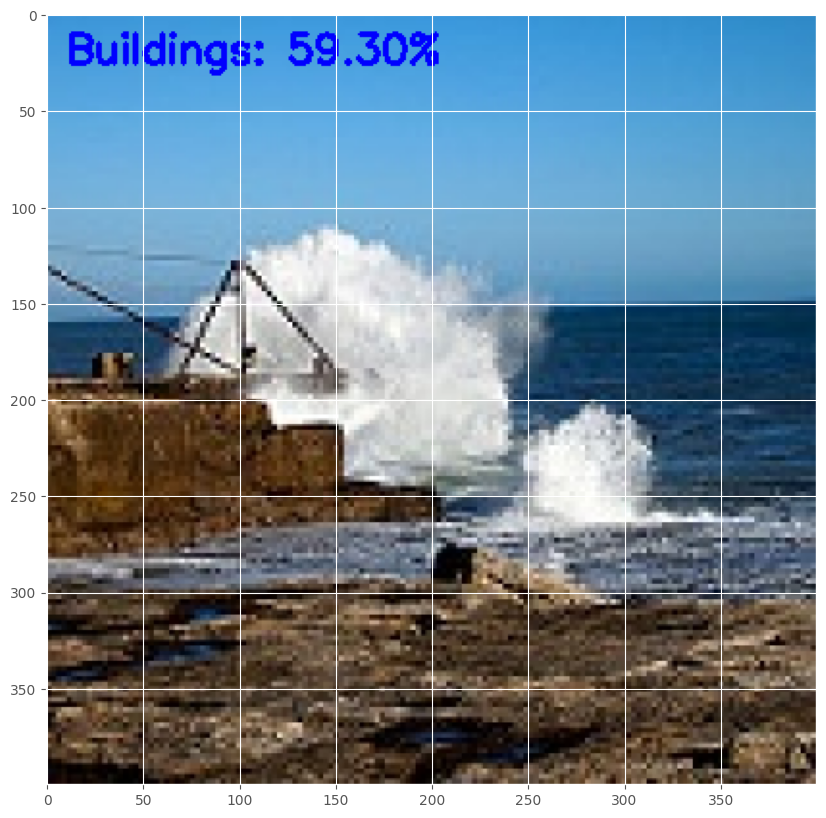

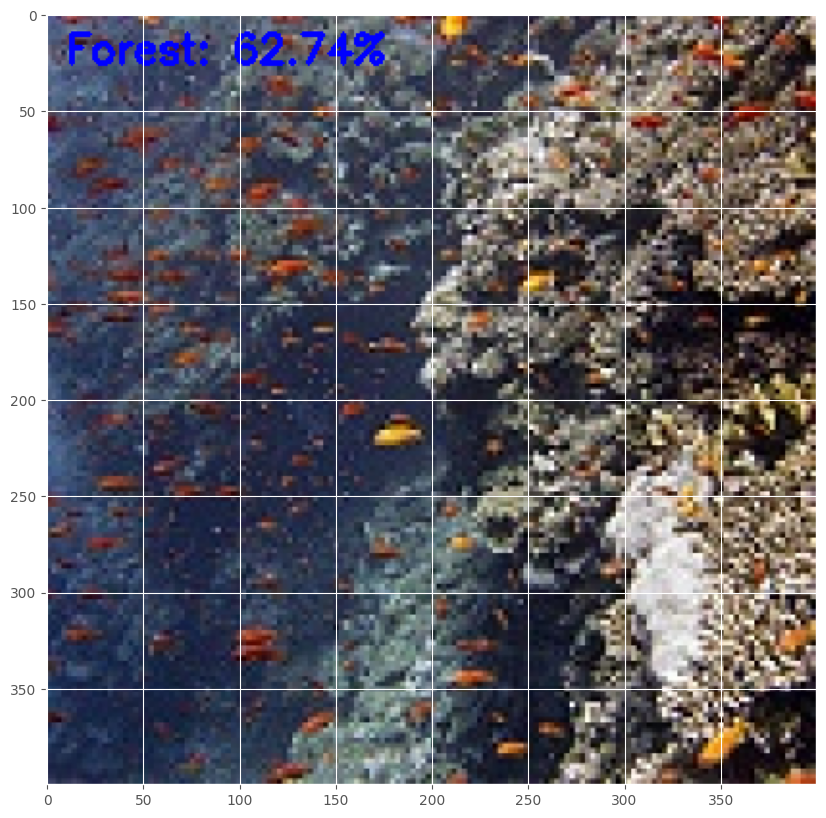

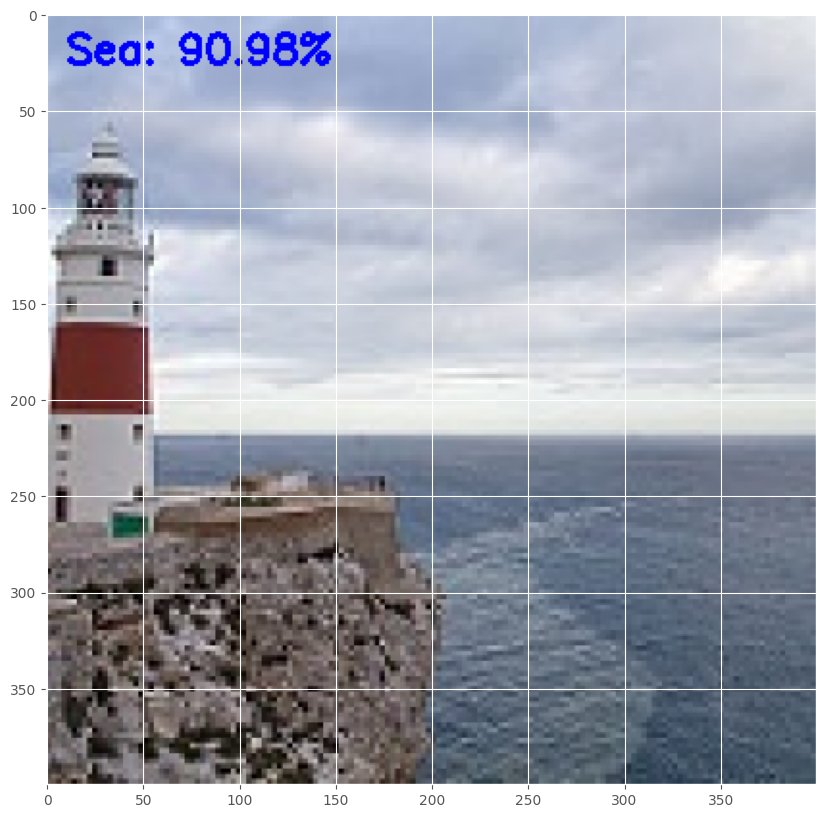

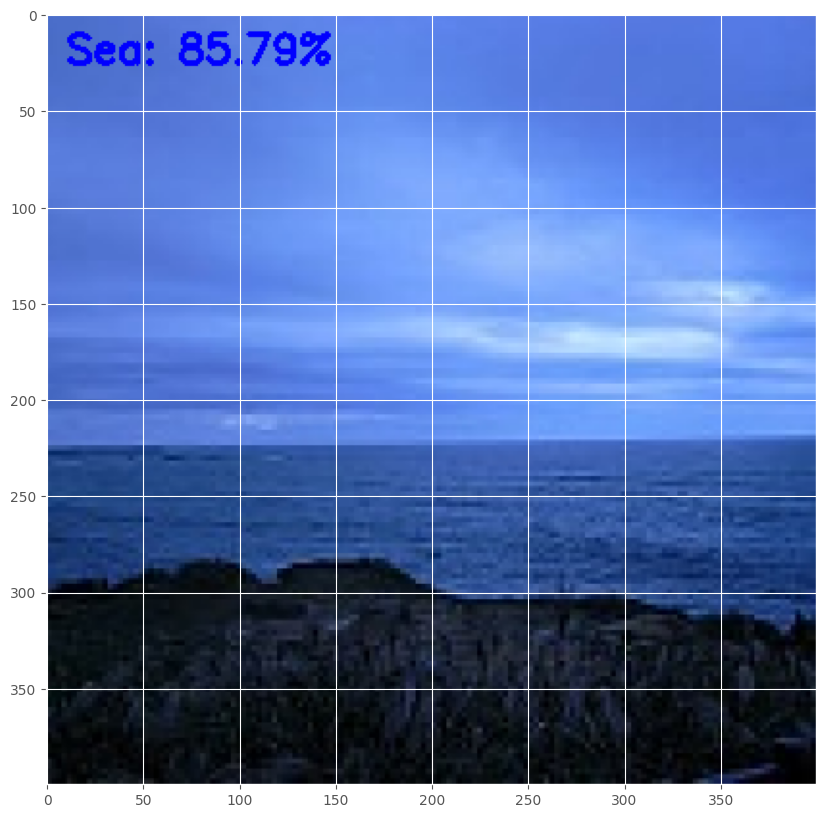

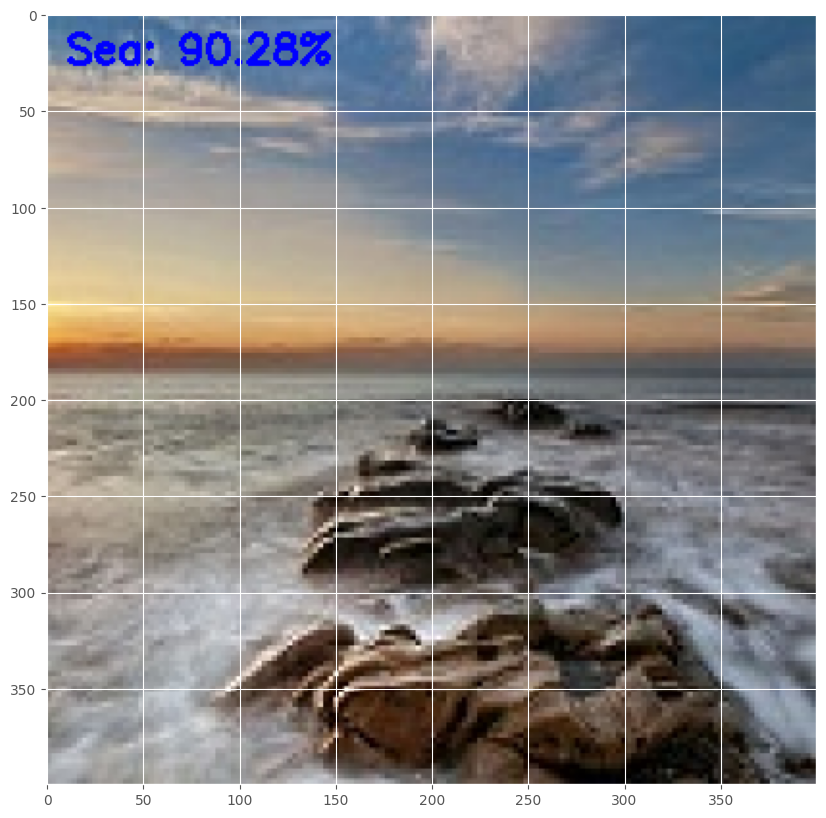

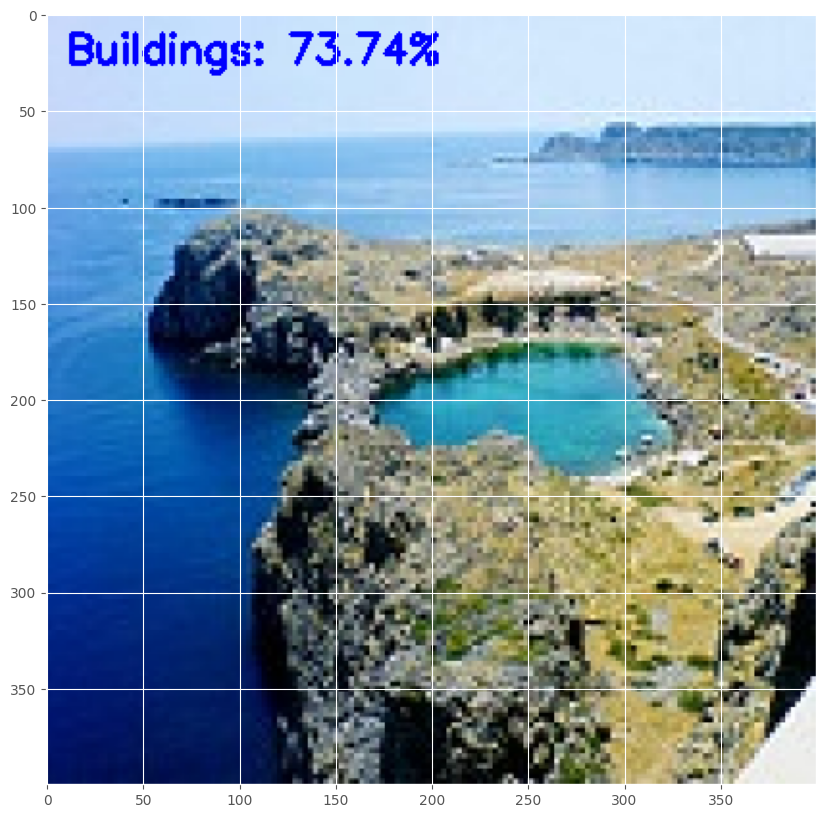

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test_examples')))   # data folder with 2 categorical folders

all_class = ["Buildings", "Forest", "Sea"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= le_model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Buildings"] = round(float(list(preds)[0]), 3)
    result["Forest"] = round(float(list(preds)[1]), 3)
    result["Sea"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result